# Project 2 Part 1

## Data Loading and Initial Exploration

### Read Data

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

In [2]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

In [3]:
sou = pd.read_csv('data/SOTU.csv')
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


### EDA

#### Number of Speeches per President

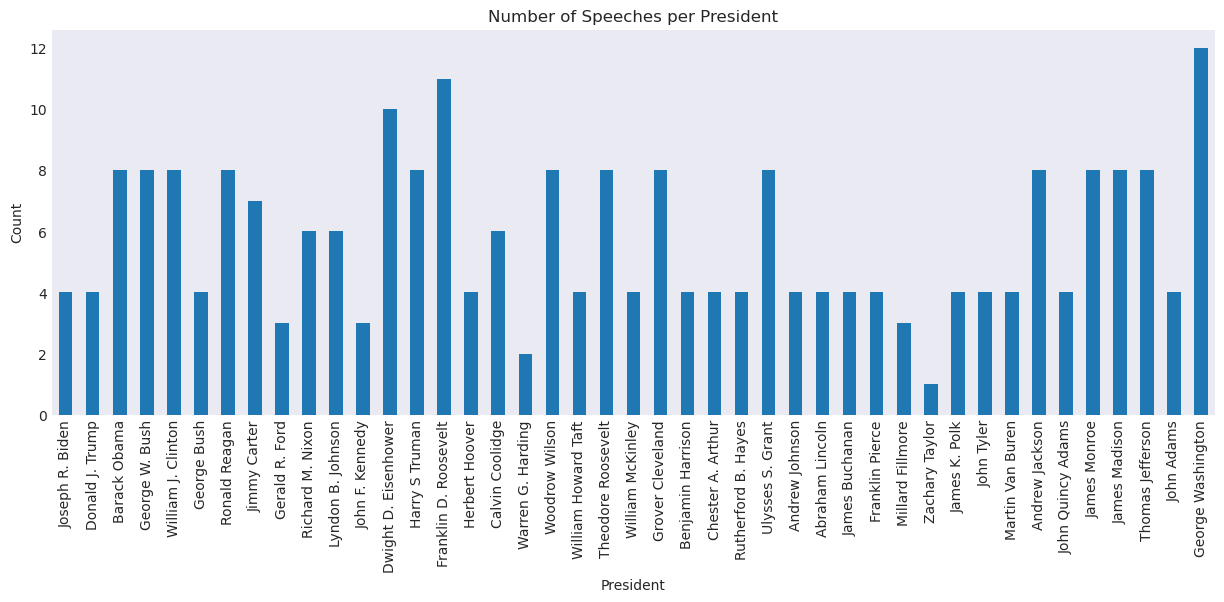

In [4]:
president_counts = sou["President"].value_counts()[sou["President"].unique()]

fig, ax = plt.subplots(figsize=(15,5))

president_counts.plot(kind='bar', ax=ax)

ax.set_title("Number of Speeches per President")
ax.set_xlabel("President")
ax.set_ylabel("Count");

The number of speeches appears to be largely correlated with the length of tenure of the president, with either 4 or 8 speeches depending on being a 1 or 2-term president respectively. Special cases like FDR who was elected 4 times and George Washington for being the first president have more speeches than usual; other cases where the president's tenure is cut short by death in office or succession to presidency tend to result in fewer speeches than usual.

#### Number of Speeches per Year

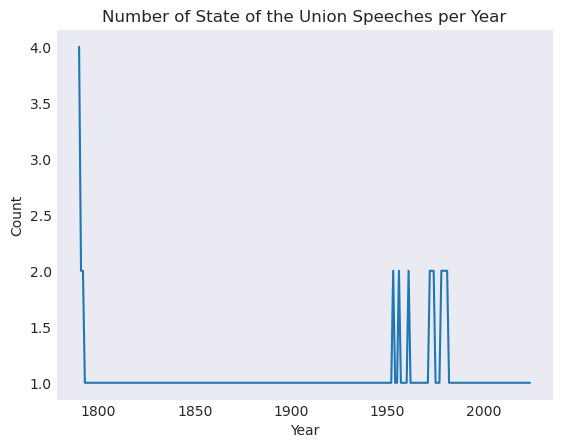

In [5]:
year_counts = sou["Year"].value_counts().sort_index()

fig, ax = plt.subplots()

year_counts.plot(ax=ax)
ax.set_title("Number of State of the Union Speeches per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count");

Throughout most of the U.S. history, we see only 1 speech per year being delivered, which makes sense because the State of Union is an annual message; however, we do see occasionnaly multiple speeches per year as shown in the plot. We can see more speeches given at the founding years of the country which is understandable and we see a cluster of multiple speeches per year in the latter half of the 20th century which may be due to presidents during that era issuing additional speeches that were counted into the datasets.

#### Word Count Distribution 

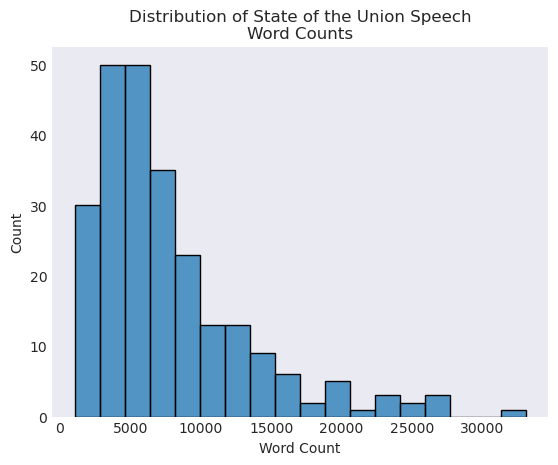

In [23]:
fig, ax = plt.subplots()

sns.histplot(
    data=sou,
    x="Word Count",
    kde=False,
    ax=ax,
    edgecolor="black"
)

ax.set_title("Distribution of State of the Union Speech\nWord Counts")
ax.set_xlabel("Word Count")
ax.set_ylabel("Count");

Based on the plot, the distribution of word counts is right-skewed. Most speeches fall roughly between 5000 to 10000 words, while some occasionally go on for much longer; we can see a few outliers that reach beyond 20000 words.

#### Word Count Distribution over Year

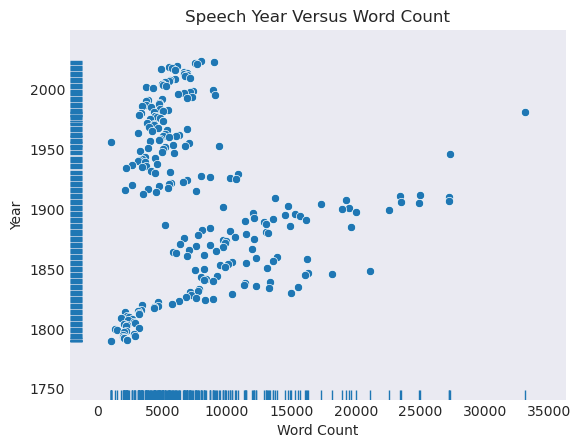

In [30]:
sns.scatterplot(
    data=sou,
    x="Word Count",
    y="Year"
)

sns.rugplot(
    data=sou,
    x="Word Count",
    y="Year"
)

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year");

The scatter plot shows relatively weak correlation between word count and the year that the speech was delivered in. However, we can see that earlier speeches (before and around 1800s) tend to be shorter and more modern speeches tend to cluster around the 5000 to 10000 mark. Longer speeches appear to be more frequent in the 19th century. The rugplot reflects the same trend as we noticed in distribution histogram from earlier.

#### Word Count Distribution per President